# Spam Detection using Logistic Regression

In [1]:
!pip install wordcloud


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


### Step 1: Load and Prepare the Data

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('spam.csv')

# Display the first few rows of the dataset
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Step 2: Convert 'ham' to 0 and 'spam' to 1

In [3]:
# Map 'ham' to 0 and 'spam' to 1
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

# Check the first few rows to confirm
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Step 3: Word Cloud Generation for Spam and All Messages

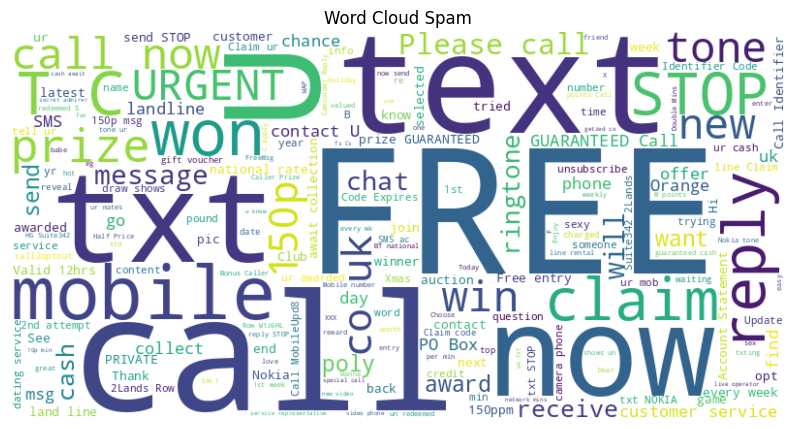

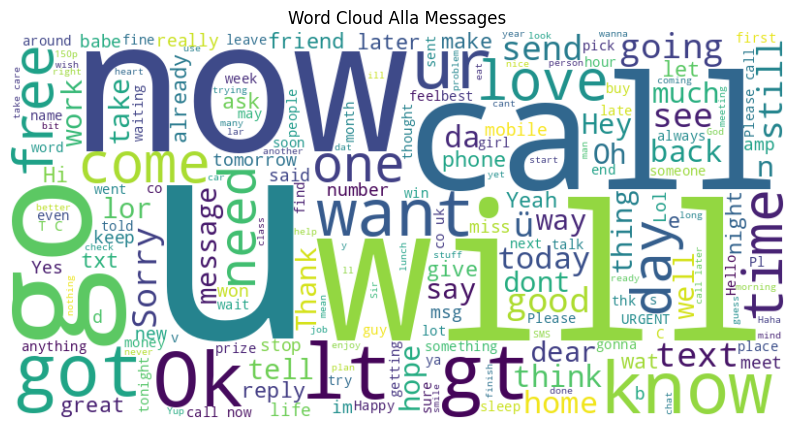

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word cloud for spam-only messages
spam_messages = ' '.join(data[data['Category'] == 1]['Message'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_messages)

plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Spam')
plt.show()

# Word cloud for all messages
all_messages = ' '.join(data['Message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Alla Messages')
plt.show()

### Step 4: Vectorize the Text Data using TF-IDF

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the 'Message' column using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(data['Message'])

# Target variable
y = data['Category']

### Step 5: Split Data into Training and Testing Sets

In [6]:
from sklearn.model_selection import train_test_split

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 6: Train the Logistic Regression Classifier

In [7]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Step 7: Evaluate the Model

In [8]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test set
y_pred_lr = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_report_lr = classification_report(y_test, y_pred_lr)

print('Accuracy:', accuracy_lr)
print('Classification Report:', classification_report_lr)

Accuracy: 0.967713004484305
Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



### Step 8: Predict if a Message is Spam or Not

In [9]:
def predict_spam(text, vectorizer, model):
    text_transformed = vectorizer.transform([text])
    prediction = model.predict(text_transformed)
    return 'Is Spam' if prediction[0] == 1 else 'Is Not Spam'

# Example usage
text = "FREE mobile device click link bellow. call us now"
text1 = "Hello i want a coffee"
print(f"{text}: {predict_spam(text, vectorizer, logistic_regression_model)} \n {text1}: {predict_spam(text1, vectorizer, logistic_regression_model)}")

FREE mobile device click link bellow. call us now: Is Spam 
 Hello i want a coffee: Is Not Spam


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=53574253-4d79-471e-89ad-67cba21e8970' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>